In [9]:
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Seleccionar las columnas numéricas para el análisis estadístico
columnas_numericas = ['antiguedad', 'total_defectos']

# Calcular medidas de tendencia central y dispersión
resumen = df[columnas_numericas].describe().T

# Añadir la moda
for col in columnas_numericas:
    resumen.loc[col, 'moda'] = df[col].mode()[0]

print("Resumen estadístico de las variables numéricas:")
print(resumen)

Resumen estadístico de las variables numéricas:
                   count      mean       std  min   25%   50%   75%   max  \
antiguedad      307798.0  16.98333  6.172425  0.0  14.0  17.0  20.0  94.0   
total_defectos  307798.0   1.00000  0.000000  1.0   1.0   1.0   1.0   1.0   

                moda  
antiguedad      17.0  
total_defectos   1.0  


In [10]:
import pandas as pd

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Seleccionar columnas dummies relacionadas con tipo de vehículo e inspección
columnas_frecuencia = [col for col in df.columns if col.startswith("TRVTIPVE_") or col.startswith("TRVPROSE_")]

# Calcular frecuencias absolutas y relativas
frecuencias = pd.DataFrame({
    "Frecuencia_absoluta": df[columnas_frecuencia].sum(),
    "Frecuencia_relativa (%)": df[columnas_frecuencia].mean() * 100
})

frecuencias

,Frecuencia_absoluta,Frecuencia_relativa (%)
TRVPROSE_SEGUNDA Y SUCESIVAS,26964,8.760291
TRVTIPVE_AUTOBUS,1677,0.544838
TRVTIPVE_AUTOCARAVANA,342,0.111112
TRVTIPVE_CAMION<=3500 KG,10149,3.297292
TRVTIPVE_CAMION>12000 KG,8029,2.608529
TRVTIPVE_CICLOMOTOR,2946,0.957121
TRVTIPVE_CUADRICICLO,45,0.014620
TRVTIPVE_FURGON<=3500 KG,23214,7.541959
TRVTIPVE_FURGON>3500 KG,67,0.021768
TRVTIPVE_MIXTO,35290,11.465312


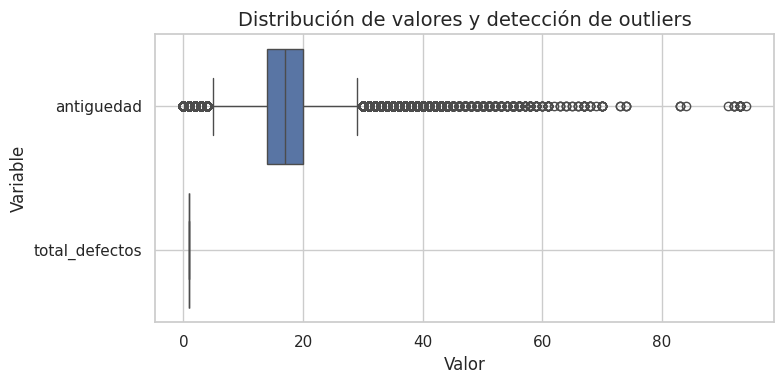

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar solo las columnas necesarias
df = pd.read_csv('/content/dataset_vehiculos_limpio.csv', usecols=['antiguedad', 'total_defectos'])

# Configurar estilo visual
sns.set(style="whitegrid")

# Gráfico de boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['antiguedad', 'total_defectos']], orient='h')
plt.title('Distribución de valores y detección de outliers', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

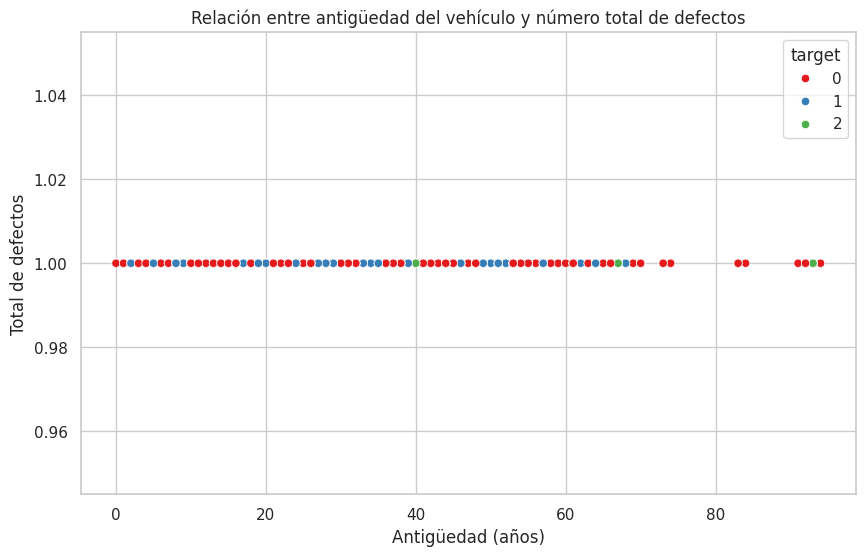

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='antiguedad', y='total_defectos', hue='target', palette='Set1')
plt.title('Relación entre antigüedad del vehículo y número total de defectos')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Total de defectos')
plt.grid(True)
plt.show()


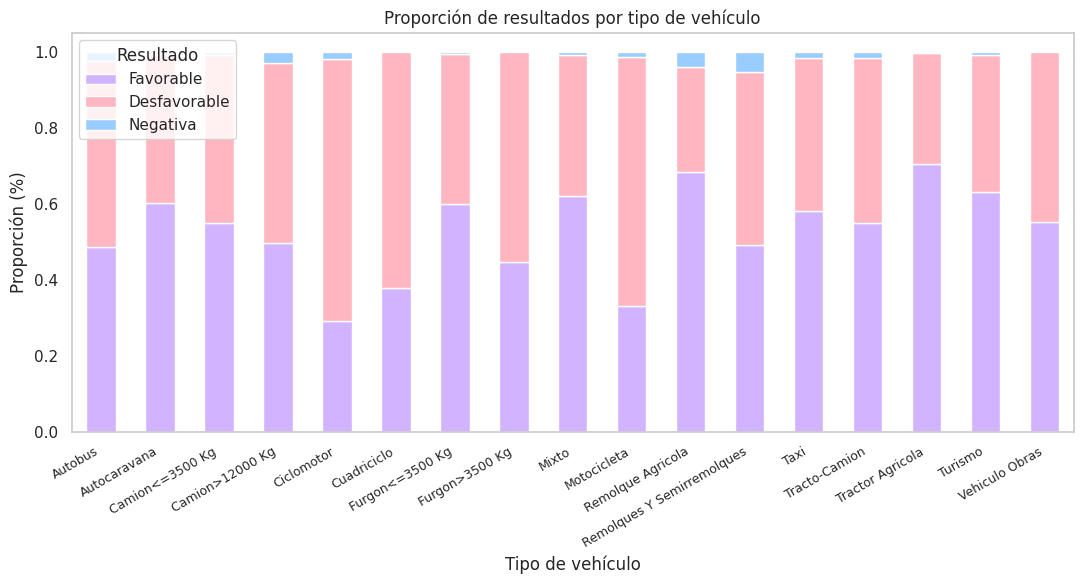

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Filtrar columnas de tipo de vehículo
veh_cols = [col for col in df.columns if 'TRVTIPVE_' in col]

# Crear recuentos por tipo de vehículo y resultado
frecuencias = {}

for col in veh_cols:
    conteo = df[df[col] == True]['target'].value_counts()
    frecuencias[col] = conteo


df_barras = pd.DataFrame(frecuencias).T.fillna(0)
df_barras.columns = ['Favorable', 'Desfavorable', 'Negativa']


df_apilado = df_barras.div(df_barras.sum(axis=1), axis=0)


colores = ['#D1B3FF', '#FFB6C1', '#99CCFF']  # Morado claro, rosa claro, azul claro


ax = df_apilado.plot(
    kind='bar',
    stacked=True,
    figsize=(11, 6),
    color=colores
)

plt.title('Proporción de resultados por tipo de vehículo')
plt.ylabel('Proporción (%)')
plt.xlabel('Tipo de vehículo')

nombres_vehiculos = [col.replace('TRVTIPVE_', '').replace('_', ' ').title() for col in df_apilado.index]
ax.set_xticklabels(nombres_vehiculos, rotation=30, ha='right', fontsize=9)

plt.grid(False)
plt.legend(title='Resultado', loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-2-2339492087>:6: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')


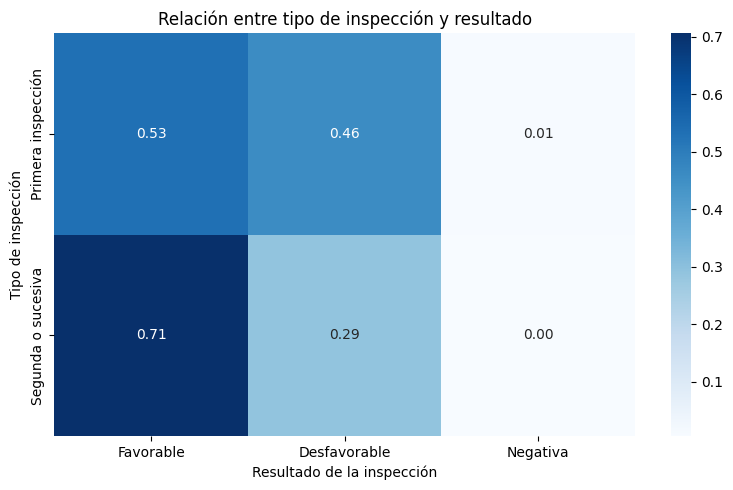

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')


df_ct = pd.crosstab(index=df['TRVPROSE_SEGUNDA Y SUCESIVAS'],
                    columns=df['target'],
                    normalize='index')


df_ct.columns = ['Favorable', 'Desfavorable', 'Negativa']
df_ct.index = ['Primera inspección', 'Segunda o sucesiva']

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_ct, annot=True, cmap='Blues', fmt=".2f")
plt.title('Relación entre tipo de inspección y resultado')
plt.xlabel('Resultado de la inspección')
plt.ylabel('Tipo de inspección')
plt.tight_layout()
plt.show()